# Data Access

In [2]:
api_url = "https://earth-search.aws.element84.com/v0"

In [3]:
from pystac_client import Client

In [4]:
client = Client.open(api_url)

In [6]:
for collection in client.get_collections():
    print(collection)

<CollectionClient id=sentinel-s2-l2a>
<CollectionClient id=sentinel-s2-l1c>
<CollectionClient id=sentinel-s2-l2a-cogs>
<CollectionClient id=landsat-8-l1-c1>


In [8]:
collection_id = "sentinel-s2-l2a-cogs"

In [9]:
from shapely.geometry import Point

In [11]:
point = Point(4.89, 52.37)  # AMS coorditanes

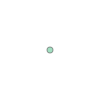

In [13]:
point

In [14]:
search = client.search(
    collections=[collection_id],
    intersects=point,
    max_items=10,
)

In [15]:
search.matched()

779

In [16]:
items = search.get_all_items()

In [17]:
items

id: S2B_31UFU_20230328_0_L2A
"bbox: [4.809872421742005, 52.22257539160586, 6.1417542968794585, 53.22867906058126]"
datetime: 2023-03-28T10:46:28Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
gsd: 10
view:off_nadir: 0
proj:epsg: 32631
sentinel:utm_zone: 31
sentinel:latitude_band: U


In [18]:
len(items)

10

In [19]:
for item in items:
    print(item)

<Item id=S2B_31UFU_20230328_0_L2A>
<Item id=S2A_31UFU_20230326_0_L2A>
<Item id=S2A_31UFU_20230323_0_L2A>
<Item id=S2B_31UFU_20230321_1_L2A>
<Item id=S2B_31UFU_20230318_0_L2A>
<Item id=S2A_31UFU_20230316_0_L2A>
<Item id=S2A_31UFU_20230313_0_L2A>
<Item id=S2B_31UFU_20230311_0_L2A>
<Item id=S2B_31UFU_20230308_0_L2A>
<Item id=S2A_31UFU_20230306_0_L2A>


In [20]:
item = items[0]

In [22]:
item.datetime

datetime.datetime(2023, 3, 28, 10, 46, 28, tzinfo=tzutc())

In [23]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[6.071664488869862, 52.22257539160586],
   [4.809872421742005, 52.2486812017905],
   [5.234043867697867, 53.22867906058126],
   [6.1417542968794585, 53.20819279121764],
   [6.071664488869862, 52.22257539160586]]]}

In [25]:
from shapely.geometry import shape

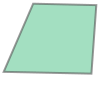

In [26]:
shape(item.geometry)

In [27]:
item.properties

{'datetime': '2023-03-28T10:46:28Z',
 'platform': 'sentinel-2b',
 'constellation': 'sentinel-2',
 'instruments': ['msi'],
 'gsd': 10,
 'view:off_nadir': 0,
 'proj:epsg': 32631,
 'sentinel:utm_zone': 31,
 'sentinel:latitude_band': 'U',
 'sentinel:grid_square': 'FU',
 'sentinel:sequence': '0',
 'sentinel:product_id': 'S2B_MSIL2A_20230328T103639_N0509_R008_T31UFU_20230328T134002',
 'sentinel:data_coverage': 66.9,
 'eo:cloud_cover': 0,
 'sentinel:valid_cloud_cover': False,
 'sentinel:processing_baseline': '05.09',
 'sentinel:boa_offset_applied': True,
 'created': '2023-03-28T17:38:04.879Z',
 'updated': '2023-03-28T17:38:04.879Z'}

In [28]:
# query: bbox, datetime, cloud cover

In [33]:
bbox = point.buffer(0.01).bounds

In [39]:
type(bbox)

tuple

In [34]:
date_range = "2020-03-20/2020-03-30"

In [35]:
query_cloud_cover = "eo:cloud_cover<10"

In [36]:
search = client.search(
    collections=[collection_id],
    bbox=bbox,
    datetime=date_range,
    query=[query_cloud_cover],
)

In [37]:
search.matched()

4

In [40]:
items = search.get_all_items()

In [41]:
len(items)

4

In [44]:
# items.save_object("search.geojson")

In [46]:
item = items[0]

In [47]:
item.assets

{'thumbnail': <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/31/U/FU/2020/3/28/0/preview.jpg>,
 'overview': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/L2A_PVI.tif>,
 'info': <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/31/U/FU/2020/3/28/0/tileInfo.json>,
 'metadata': <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/31/U/FU/2020/3/28/0/metadata.xml>,
 'visual': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/TCI.tif>,
 'B01': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B01.tif>,
 'B02': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B02.tif>,
 'B03': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/

In [48]:
item.assets.keys()

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])

In [50]:
asset = item.assets["thumbnail"]

In [51]:
asset.href

'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/31/U/FU/2020/3/28/0/preview.jpg'

In [52]:
import rioxarray

In [53]:
b01_href = item.assets["B01"].href

In [54]:
b01_href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_0_L2A/B01.tif'

In [55]:
b01 = rioxarray.open_rasterio(b01_href)

In [56]:
b01

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [57]:
api_url_cmr = "https://cmr.earthdata.nasa.gov/stac/LPCLOUD"

In [58]:
client_cmr = Client.open(api_url_cmr)

In [59]:
search_cmr = client_cmr.search(
    collections=["HLSL30.v2.0"],
    datetime="2021-02-01/2021-03-31",
    intersects=Point(-73.97, 40.78),
)

In [60]:
search_cmr.matched()

5

In [61]:
items_cmr = search_cmr.get_all_items() 

In [62]:
items_cmr

id: HLS.L30.T18TWL.2021039T153324.v2.0
"bbox: [-74.392491, 40.555473, -73.6838, 41.548251]"
eo:cloud_cover: 6
datetime: 2021-02-08T15:33:24.028Z
start_datetime: 2021-02-08T15:33:24.028Z
end_datetime: 2021-02-08T15:33:47.911Z
https://stac-extensions.github.io/eo/v1.0.0/schema.json
href: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B05.tif
title: Download HLS.L30.T18TWL.2021039T153324.v2.0.B05.tif
owner: HLS.L30.T18TWL.2021039T153324.v2.0
href: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.B06.tif


In [65]:
items_cmr[0].assets.keys()

dict_keys(['B05', 'B06', 'B01', 'B11', 'B03', 'Fmask', 'B04', 'VAA', 'B09', 'VZA', 'B02', 'SAA', 'SZA', 'B07', 'B10', 'browse', 'metadata'])

In [67]:
items_cmr[0].assets["browse"].href

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg'